In [1]:
#Dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from collections import defaultdict
pd.options.mode.chained_assignment = None

In [2]:
#Store filepaths
data_import = "Resources/cities_of_interest.csv"
cities_pop_df = pd.read_csv(data_import)
cities_pop_df.rename(columns={"Geo ID":"GeoID", "City":"MetroArea", "Total Growth":"TotalGrowth", "Population 2017":"Pop2017"}, inplace=True)

#Create list of the Geo IDs and population
geo_list = list(cities_pop_df['GeoID'])
pop_list = list(cities_pop_df['Pop2017'])

#Create dictionary of metros to populations
pop_dict = dict(cities_pop_df[['GeoID', 'Pop2017']].values)

#Create dictionory of metros to pop. growth
growth_dict = dict(cities_pop_df[['GeoID', 'TotalGrowth']].values)

#Convert dictionary to dataframe
pop_df = cities_pop_df[["GeoID", "Pop2017"]]
pop_df["Pop2017"] = pop_df["Pop2017"]/100000
pop_df.rename(columns={"Pop2017":"Pop_100,000s"}, inplace=True)
#pop_df.head()


In [3]:
data2 = "Resources/Accomodation and Food Services_2012_Metros.csv"
food_data_df = pd.read_csv(data2)
data3 = "Resources/Arts_Ent_Rec_2012_Metros.csv"
ent_data_df = pd.read_csv(data3, low_memory=False)
data4 = "Resources/Retail_Data_2012_Metros.csv"
retail_data_df = pd.read_csv(data4)

In [4]:
#Create separate dataframe for highest growth metro areas
cities_top_df = cities_pop_df.iloc[:10,:]
cities_top_df

GeoID                                          MetroArea  TotalGrowth  \
0  12420                   Austin-Round Rock, TX Metro Area    22.479486   
1  39580                             Raleigh, NC Metro Area    17.380624   
2  36740           Orlando-Kissimmee-Sanford, FL Metro Area    17.319266   
3  26420    Houston-The Woodlands-Sugar Land, TX Metro Area    15.889380   
4  41700           San Antonio-New Braunfels, TX Metro Area    14.910303   
5  19100         Dallas-Fort Worth-Arlington, TX Metro Area    14.690848   
6  16740       Charlotte-Concord-Gastonia, NC-SC Metro Area    13.588950   
7  34980  Nashville-Davidson--Murfreesboro--Franklin, TN...    13.563303   
8  19740              Denver-Aurora-Lakewood, CO Metro Area    13.068749   
9  29820        Las Vegas-Henderson-Paradise, NV Metro Area    12.956180   

   Pop2017  
0  2115827  
1  1335079  
2  2509831  
3  6892427  
4  2473974  
5  7399662  
6  2525305  
7  1903045  
8  2888227  
9  2204079

In [5]:
#Create separate dataframe for lowest growth metro areas
cities_bot_df = cities_pop_df.iloc[10:,:]
cities_bot_df

GeoID                                          MetroArea  TotalGrowth  \
10  41980            San Juan-Carolina-Caguas, PR Metro Area   -10.046948   
11  38300                          Pittsburgh, PA Metro Area    -1.001959   
12  17460                    Cleveland-Elyria, OH Metro Area    -0.805230   
13  25540  Hartford-West Hartford-East Hartford, CT Metro...    -0.336314   
14  40380                           Rochester, NY Metro Area    -0.215870   
15  15380   Buffalo-Cheektowaga-Niagara Falls, NY Metro Area     0.100906   
16  19820             Detroit-Warren-Dearborn, MI Metro Area     0.506025   
17  41180                        St. Louis, MO-IL Metro Area     0.626483   
18  16980      Chicago-Naperville-Elgin, IL-IN-WI Metro Area     0.755680   
19  39300               Providence-Warwick, RI-MA Metro Area     1.243560   

    Pop2017  
10  2112005  
11  2333367  
12  2058844  
13  1210259  
14  1077948  
15  1136856  
16  4313002  
17  2807338  
18  9533040  
19  1621122

In [6]:
food_data_df.head()

GEO.id GEO.id2       GEO.display-label  \
0  Geographic identifier code     Id2    Geographic area name   
1              310M200US10180   10180  Abilene, TX Metro Area   
2              310M200US10180   10180  Abilene, TX Metro Area   
3              310M200US10180   10180  Abilene, TX Metro Area   
4              310M200US10180   10180  Abilene, TX Metro Area   

          NAICS.id                       NAICS.display-label YEAR.id  \
0  2012 NAICS code                Meaning of 2012 NAICS code    Year   
1               72           Accommodation and food services    2012   
2              721                             Accommodation    2012   
3             7211                    Traveler accommodation    2012   
4            72111  Hotels (except casino hotels) and motels    2012   

                      ESTAB          RCPTOT                   PAYANN  \
0  Number of establishments  Sales ($1,000)  Annual payroll ($1,000)   
1                       336          316867                    88861   
2                        48           46352                     9922   
3                        43               D                        D   
4                        43               D                        D   

                          PAYQTR1  \
0  First-quarter payroll ($1,000)   
1                           21548   
2                            2394   
3                               D   
4                               D   

                                                 EMP  \
0  Number of paid employees for pay period includ...   
1                                               6732   
2                                                656   
3                                                  f   
4                                                  f   

                                          ADMIN_PCT  \
0  Percent of sales from administrative records (%)   
1                                                19   
2                                              30.2   
3                                                 D   
4                                                 D   

                        IMPUT_PCT  
0  Percent of sales estimated (%)  
1                             9.4  
2                             0.7  
3                               D  
4                               D

In [7]:
food_data_df.rename(columns={"GEO.id2":"GeoID", "GEO.display-label":"MetroArea", "NAICS.id":"NAICScode",
                            "NAICS.display-label":"Category", "ESTAB":"Establishments",
                            "RCPTOT":"Sales($1,000)"}, inplace=True)
rest_df = food_data_df[["GeoID", "MetroArea", "NAICScode", "Category", "Establishments", "Sales($1,000)"]]
rest_categories = ["GeoID", "MetroArea", "NAICScode", "Category", "Establishments", "Sales($1,000)"]
restaurants_df = rest_df.iloc[1:]
restaurants_df.head(10)


GeoID               MetroArea NAICScode  \
1   10180  Abilene, TX Metro Area        72   
2   10180  Abilene, TX Metro Area       721   
3   10180  Abilene, TX Metro Area      7211   
4   10180  Abilene, TX Metro Area     72111   
5   10180  Abilene, TX Metro Area    721110   
6   10180  Abilene, TX Metro Area      7212   
7   10180  Abilene, TX Metro Area     72121   
8   10180  Abilene, TX Metro Area    721211   
9   10180  Abilene, TX Metro Area    721214   
10  10180  Abilene, TX Metro Area       722   

                                             Category Establishments  \
1                     Accommodation and food services            336   
2                                       Accommodation             48   
3                              Traveler accommodation             43   
4            Hotels (except casino hotels) and motels             43   
5            Hotels (except casino hotels) and motels             43   
6   RV (recreational vehicle) parks and recreation...              5   
7   RV (recreational vehicle) parks and recreation...              5   
8     RV (recreational vehicle) parks and campgrounds              3   
9   Recreational and vacation camps (except campgr...              2   
10                  Food services and drinking places            288   

   Sales($1,000)  
1         316867  
2          46352  
3              D  
4              D  
5              D  
6              D  
7              D  
8              D  
9              D  
10        270515

In [8]:
#Create list of NAICS codes for restaurants/bars
rest_naics = ['7224', '7225']

#Filter restaurants to only include metros and NAICS codes of interest
restaurants_filtr = restaurants_df[restaurants_df.GeoID.isin(map(str, geo_list)) & restaurants_df.NAICScode.isin(map(str, rest_naics))]

d1 = pop_df.dtypes.astype(str).to_dict()

#Convert datatypes of both dataframes to be the same
restaurants_filtr = restaurants_filtr.convert_objects(convert_numeric=True)
restaurants_filtr.dtypes

d2 = restaurants_filtr.dtypes.astype(str).to_dict()
#print(d2)

#Add population (in 100,000s) to new column for each metro
restaurants_filtr['Pop_100,000s'] = restaurants_filtr.GeoID.map(pop_dict)
restaurants_filtr['Pop_100,000s'] = restaurants_filtr['Pop_100,000s']/100000

#Calculate establishments per capita, and place in new column
restaurants_filtr['Est_per_capita'] = restaurants_filtr['Establishments']/restaurants_filtr['Pop_100,000s']

#Calculate sales in $millions per capita, and place in new column
restaurants_filtr['Sales_per_\ncapita_$millions'] = restaurants_filtr['Sales($1,000)']/restaurants_filtr['Pop_100,000s']/1000

restaurants_filtr.head()

C:\Users\sharv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


GeoID                                         MetroArea  NAICScode  \
638   12420                  Austin-Round Rock, TX Metro Area       7224   
641   12420                  Austin-Round Rock, TX Metro Area       7225   
1466  15380  Buffalo-Cheektowaga-Niagara Falls, NY Metro Area       7224   
1469  15380  Buffalo-Cheektowaga-Niagara Falls, NY Metro Area       7225   
1880  16740      Charlotte-Concord-Gastonia, NC-SC Metro Area       7224   

                                   Category  Establishments  Sales($1,000)  \
638   Drinking places (alcoholic beverages)             278         263147   
641     Restaurants and other eating places            3120        3444560   
1466  Drinking places (alcoholic beverages)             308          67715   
1469    Restaurants and other eating places            2079        1587274   
1880  Drinking places (alcoholic beverages)             164          96709   

      Pop_100,000s  Est_per_capita  Sales_per_\ncapita_$millions  
638       21.15827       13.139070                     12.437075  
641       21.15827      147.460071                    162.799700  
1466      11.36856       27.092261                      5.956339  
1469      11.36856      182.872765                    139.619618  
1880      25.25305        6.494265                      3.829597

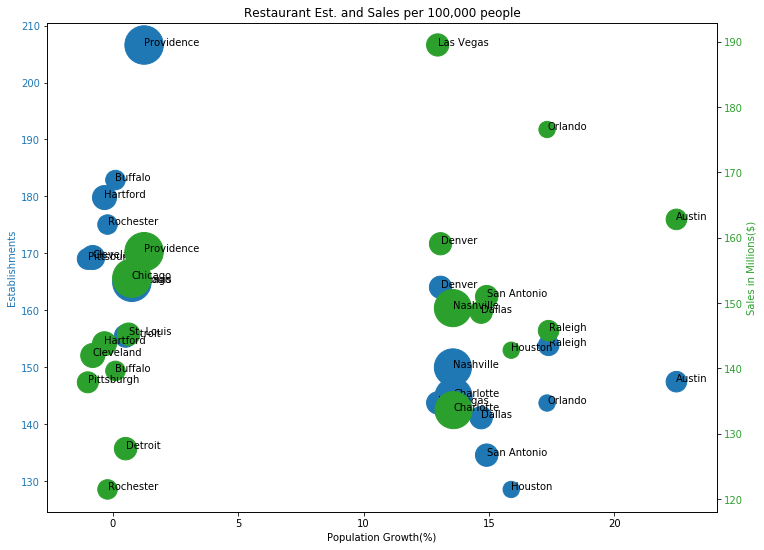

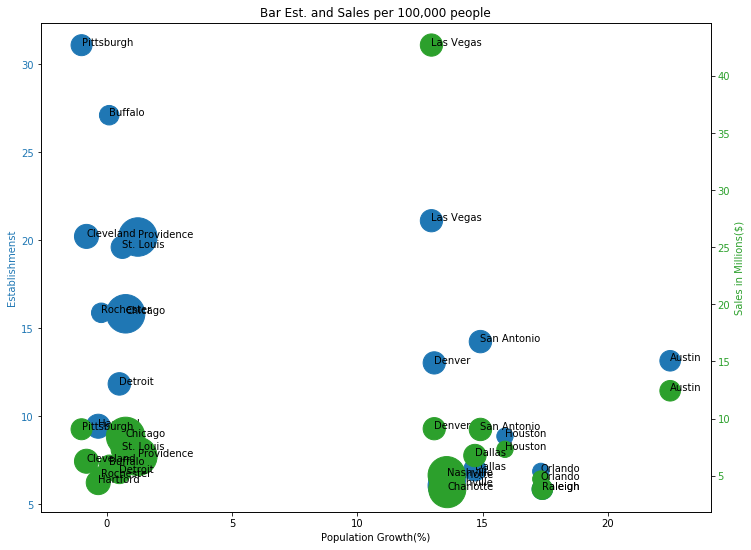

In [9]:
#Add population growth to table to order put in order of decreasing growth
restaurants_filtr["Pop_Growth"] = restaurants_filtr.GeoID.map(growth_dict)
restaurants_filtr.sort_values(by=["Pop_Growth"], ascending=False, inplace=True)
restaurants_filtr["MetroArea"] = restaurants_filtr["MetroArea"].apply(lambda x: x.split('-')[0])
restaurants_filtr["MetroArea"] = restaurants_filtr["MetroArea"].apply(lambda x: x.split(',')[0])

#Separate data by naics code
rest = restaurants_filtr[restaurants_filtr['NAICScode'] == 7225]
bar = restaurants_filtr[restaurants_filtr['NAICScode'] == 7224]

#Scatter plot for restaurant data
#-----------
fig, ax1 = plt.subplots(figsize=(12,9))

rest_x = rest["Pop_Growth"]
rest_y1 = rest["Est_per_capita"]
rest_y2 = rest["Sales_per_\ncapita_$millions"]

color= 'tab:blue'
ax1.set_xlabel('Population Growth(%)')
ax1.set_ylabel('Establishments', color=color)
ax1.scatter(rest_x, rest_y1, color=color, alpha=1, label='Establishments', s=restaurants_filtr['Pop_100,000s']*20)
ax1.tick_params(axis='y', labelcolor=color)
for i, txt in enumerate(rest.MetroArea):
    ax1.annotate(txt, (rest.Pop_Growth.iat[i], rest.Est_per_capita.iat[i]))

ax2 = ax1.twinx()

color= 'tab:green'
ax2.set_ylabel('Sales in Millions($)', color=color)
ax2.scatter(rest_x, rest_y2, color=color, alpha=1, label='Sales', s=restaurants_filtr['Pop_100,000s']*20)
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_title('Restaurant Est. and Sales per 100,000 people')
for i, txt in enumerate(rest.MetroArea):
    ax2.annotate(txt, (rest.Pop_Growth.iat[i], rest["Sales_per_\ncapita_$millions"].iat[i]))
plt.savefig('Outputs/Restaurant_metro_plot.png', bbox_inches='tight')
#------------

#Scatter plot for bar data
#------------

fig, ax3 = plt.subplots(figsize=(12,9))

bar_x = bar["Pop_Growth"]
bar_y1 = bar["Est_per_capita"]
bar_y2 = bar["Sales_per_\ncapita_$millions"]

color = 'tab:blue'
ax3.set_xlabel('Population Growth(%)')
ax3.set_ylabel('Establishmenst', color=color)
ax3.scatter(bar_x, bar_y1, color=color, alpha=1, label='Establishments', s=restaurants_filtr['Pop_100,000s']*20)
ax3.tick_params(axis='y', labelcolor=color)
for i, txt in enumerate(bar.MetroArea):
    ax3.annotate(txt, (bar.Pop_Growth.iat[i], bar.Est_per_capita.iat[i]))

ax4 = ax3.twinx()

color= 'tab:green'
ax4.set_ylabel('Sales in Millions($)', color=color)
ax4.scatter(bar_x, bar_y2, color=color, alpha=1, label='Sales', s=restaurants_filtr['Pop_100,000s']*20)
ax4.tick_params(axis='y', labelcolor=color)
ax3.set_title('Bar Est. and Sales per 100,000 people')
for i, txt in enumerate(bar.MetroArea):
    ax4.annotate(txt, (bar.Pop_Growth.iat[i], bar["Sales_per_\ncapita_$millions"].iat[i]))
plt.savefig('Outputs/Bar_metro_plot.png', bbox_inches='tight')

In [10]:
ent_data_df.head()

GEO.id GEO.id2       GEO.display-label  \
0  Geographic identifier code     Id2    Geographic area name   
1              310M200US10180   10180  Abilene, TX Metro Area   
2              310M200US10180   10180  Abilene, TX Metro Area   
3              310M200US10180   10180  Abilene, TX Metro Area   
4              310M200US10180   10180  Abilene, TX Metro Area   

          NAICS.id                                NAICS.display-label  \
0  2012 NAICS code                         Meaning of 2012 NAICS code   
1               71                Arts, entertainment, and recreation   
2               71                Arts, entertainment, and recreation   
3               71                Arts, entertainment, and recreation   
4              711  Performing arts, spectator sports, and related...   

                               OPTAX.id  \
0  Type of operation or tax status code   
1                                     A   
2                                     T   
3                                     Y   
4                                     A   

                               OPTAX.display-label YEAR.id  \
0  Meaning of Type of operation or tax status code    Year   
1                               All establishments    2012   
2     Establishments subject to federal income tax    2012   
3    Establishments exempt from federal income tax    2012   
4                               All establishments    2012   

                      ESTAB                     RCPTOT  \
0  Number of establishments  Receipts/Revenue ($1,000)   
1                        66                      42797   
2                        44                          D   
3                        22                          D   
4                        12                       9283   

                          OPEX                   PAYANN  \
0  Operating expenses ($1,000)  Annual payroll ($1,000)   
1                            N                    11722   
2                            N                        D   
3                            D                        D   
4                            N                     1711   

                          PAYQTR1  \
0  First-quarter payroll ($1,000)   
1                            2731   
2                               D   
3                               D   
4                             392   

                                                 EMP  \
0  Number of paid employees for pay period includ...   
1                                                683   
2                                                  e   
3                                                  e   
4                                                 86   

                                           ADMIN_PCT  \
0  Percent of receipts/revenue from administrativ...   
1                                               25.5   
2                                                  D   
3                                                  D   
4                                               24.3   

                                   IMPUT_PCT  
0  Percent of receipts/revenue estimated (%)  
1                                       14.3  
2                                          D  
3                                          D  
4                                        0.3

In [11]:
ent_data_df.rename(columns={"GEO.id2":"GeoID", "GEO.display-label":"MetroArea", "NAICS.id":"NAICScode", "OPTAX.id":"OPTAX", 
                            "NAICS.display-label":"Category", "ESTAB":"Establishments",
                            "RCPTOT":"Sales($1,000)"}, inplace=True)
ent_df = ent_data_df[["GeoID", "MetroArea", "NAICScode", "Category", "OPTAX", "Establishments", "Sales($1,000)"]]
entertainment_df = ent_df.iloc[1:]
entertainment_df = entertainment_df[entertainment_df.OPTAX == "A"]
entertainment_df.head()

GeoID               MetroArea NAICScode  \
1   10180  Abilene, TX Metro Area        71   
4   10180  Abilene, TX Metro Area       711   
7   10180  Abilene, TX Metro Area      7111   
9   10180  Abilene, TX Metro Area     71111   
11  10180  Abilene, TX Metro Area    711110   

                                             Category OPTAX Establishments  \
1                 Arts, entertainment, and recreation     A             66   
4   Performing arts, spectator sports, and related...     A             12   
7                           Performing arts companies     A              3   
9               Theater companies and dinner theaters     A              1   
11              Theater companies and dinner theaters     A              1   

   Sales($1,000)  
1          42797  
4           9283  
7              D  
9              D  
11             D

In [12]:
#Create list of NAICS codes for (performing arts, spectator sports, etc.), (museums, historical sites, etc.), and (amusement, gambling, etc.)
ent_naics = ['711', '712', '713']

#Filter restaurants to only include metros and NAICS codes of interest
ent_filtr = entertainment_df[entertainment_df.GeoID.isin(map(str, geo_list)) & entertainment_df.NAICScode.isin(map(str, ent_naics))]

d1 = pop_df.dtypes.astype(str).to_dict()

#Convert datatypes of both dataframes to be the same
ent_filtr = ent_filtr.convert_objects(convert_numeric=True)
ent_filtr.dtypes

d3 = ent_filtr.dtypes.astype(str).to_dict()
#print(d2)

#Add population (in 100,000s) to new column for each metro
ent_filtr['Pop_100,000s'] = ent_filtr.GeoID.map(pop_dict)
ent_filtr['Pop_100,000s'] = ent_filtr['Pop_100,000s']/100000

#Calculate establishments per capita, and place in new column
ent_filtr['Est_per_capita'] = ent_filtr['Establishments']/ent_filtr['Pop_100,000s']

#Calculate sales in $millions per capita, and place in new column
ent_filtr['Sales_per_\ncapita_$millions'] = ent_filtr['Sales($1,000)']/ent_filtr['Pop_100,000s']/1000

#Remove tax column, as it's including all establishments irrespective of tax category
del ent_filtr['OPTAX']

ent_filtr.head()

C:\Users\sharv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


GeoID                                         MetroArea  NAICScode  \
2831  12420                  Austin-Round Rock, TX Metro Area        711   
2922  12420                  Austin-Round Rock, TX Metro Area        712   
2952  12420                  Austin-Round Rock, TX Metro Area        713   
6618  15380  Buffalo-Cheektowaga-Niagara Falls, NY Metro Area        711   
6705  15380  Buffalo-Cheektowaga-Niagara Falls, NY Metro Area        712   

                                               Category  Establishments  \
2831  Performing arts, spectator sports, and related...             279   
2922  Museums, historical sites, and similar institu...              26   
2952     Amusement, gambling, and recreation industries             387   
6618  Performing arts, spectator sports, and related...              98   
6705  Museums, historical sites, and similar institu...              28   

      Sales($1,000)  Pop_100,000s  Est_per_capita  \
2831         338906      21.15827       13.186333   
2922          21983      21.15827        1.228834   
2952         524059      21.15827       18.290720   
6618         505902      11.36856        8.620265   
6705          40796      11.36856        2.462933   

      Sales_per_\ncapita_$millions  
2831                     16.017661  
2922                      1.038979  
2952                     24.768518  
6618                     44.500095  
6705                      3.588493

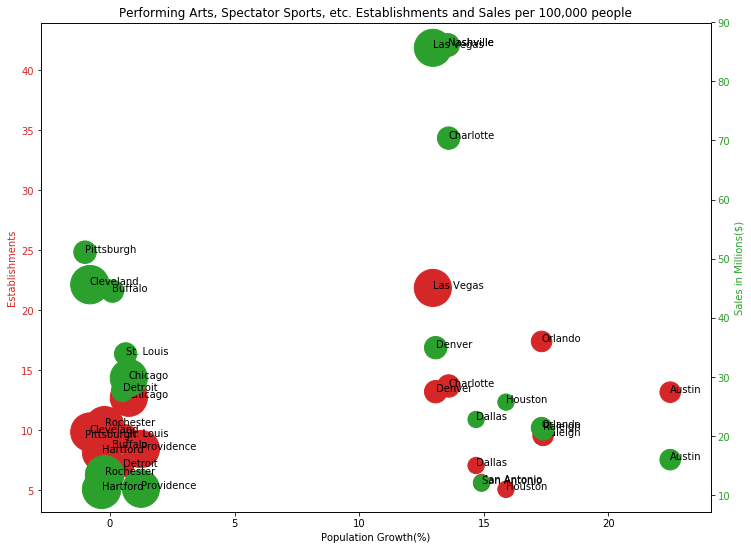

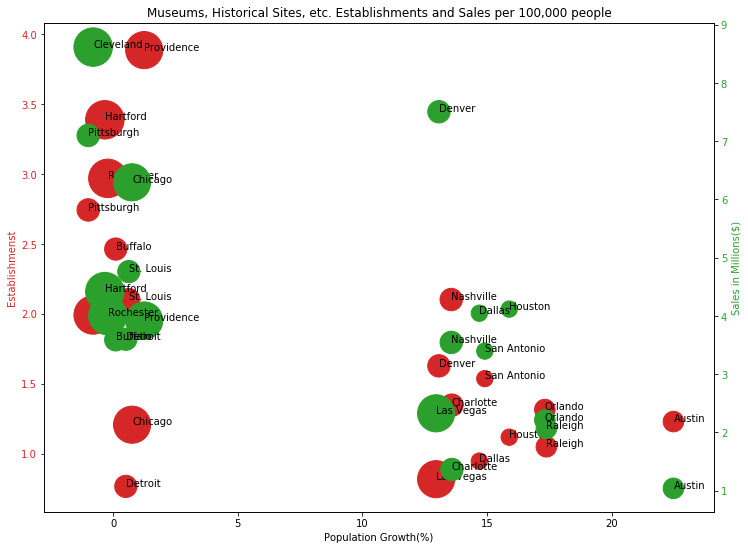

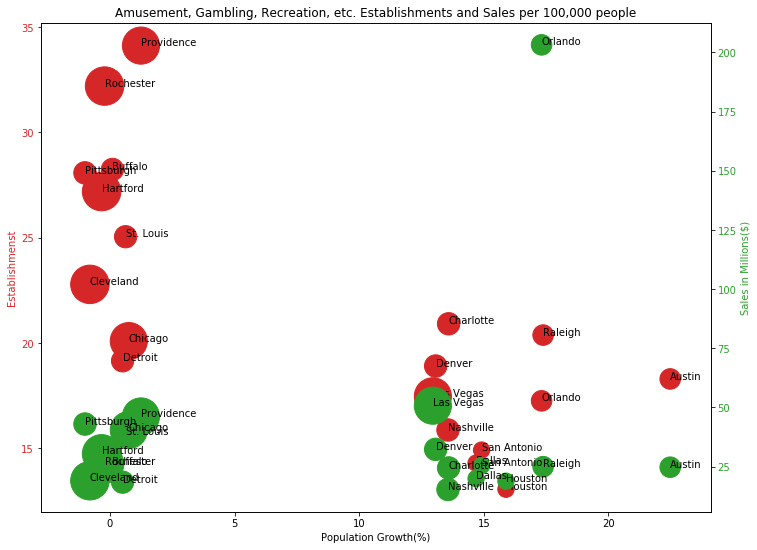

In [18]:
#Add population growth to table to order put in order of decreasing growth
ent_filtr["Pop_Growth"] = ent_filtr.GeoID.map(growth_dict)
ent_filtr.sort_values(by=["Pop_Growth"], ascending=False, inplace=True)
ent_filtr["MetroArea"] = ent_filtr["MetroArea"].apply(lambda x: x.split('-')[0])
ent_filtr["MetroArea"] = ent_filtr["MetroArea"].apply(lambda x: x.split(',')[0])

#Separate data by naics code
arts = ent_filtr[ent_filtr['NAICScode'] == 711]
museums = ent_filtr[ent_filtr['NAICScode'] == 712]
amusement = ent_filtr[ent_filtr['NAICScode'] == 713]


#Scatter plot for arts/sports data
#-----------
fig, ax5 = plt.subplots(figsize=(12,9))

arts_x = arts["Pop_Growth"]
arts_y1 = arts["Est_per_capita"]
arts_y2 = arts["Sales_per_\ncapita_$millions"]

color= 'tab:red'
ax5.set_xlabel('Population Growth(%)')
ax5.set_ylabel('Establishments', color=color)
ax5.scatter(arts_x, arts_y1, color=color, alpha=1, label='Establishments', s=ent_filtr['Pop_100,000s']*20)
ax5.tick_params(axis='y', labelcolor=color)
for i, txt in enumerate(arts.MetroArea):
    ax5.annotate(txt, (arts.Pop_Growth.iat[i], arts.Est_per_capita.iat[i]))

ax6 = ax5.twinx()

color= 'tab:green'
ax6.set_ylabel('Sales in Millions($)', color=color)
ax6.scatter(arts_x, arts_y2, color=color, alpha=1, label='Sales', s=ent_filtr['Pop_100,000s']*20)
ax6.tick_params(axis='y', labelcolor=color)
ax6.set_title('Performing Arts, Spectator Sports, etc. Establishments and Sales per 100,000 people')
for i, txt in enumerate(arts.MetroArea):
    ax6.annotate(txt, (arts.Pop_Growth.iat[i], arts["Sales_per_\ncapita_$millions"].iat[i]))
plt.savefig('Outputs/Arts_Sports_metro_plot.png', bbox_inches='tight')
#------------

#Scatter plot for museum/historical data
#------------

fig, ax7 = plt.subplots(figsize=(12,9))

museums_x = museums["Pop_Growth"]
museums_y1 = museums["Est_per_capita"]
museums_y2 = museums["Sales_per_\ncapita_$millions"]

color = 'tab:red'
ax7.set_xlabel('Population Growth(%)')
ax7.set_ylabel('Establishmenst', color=color)
ax7.scatter(museums_x, museums_y1, color=color, alpha=1, label='Establishments', s=ent_filtr['Pop_100,000s']*20)
ax7.tick_params(axis='y', labelcolor=color)
for i, txt in enumerate(museums.MetroArea):
    ax7.annotate(txt, (museums.Pop_Growth.iat[i], museums.Est_per_capita.iat[i]))

ax8 = ax7.twinx()

color= 'tab:green'
ax8.set_ylabel('Sales in Millions($)', color=color)
ax8.scatter(museums_x, museums_y2, color=color, alpha=1, label='Sales', s=ent_filtr['Pop_100,000s']*20)
ax8.tick_params(axis='y', labelcolor=color)
ax7.set_title('Museums, Historical Sites, etc. Establishments and Sales per 100,000 people')
for i, txt in enumerate(museums.MetroArea):
    ax8.annotate(txt, (museums.Pop_Growth.iat[i], museums["Sales_per_\ncapita_$millions"].iat[i]))
plt.savefig('Outputs/Museums_metro_plot.png', bbox_inches='tight')
#------------

#Scatter plots for amusement/gambling data
#------------

fig, ax9 = plt.subplots(figsize=(12,9))

amusement_x = amusement["Pop_Growth"]
amusement_y1 = amusement["Est_per_capita"]
amusement_y2 = amusement["Sales_per_\ncapita_$millions"]

color = 'tab:red'
ax9.set_xlabel('Population Growth(%)')
ax9.set_ylabel('Establishmenst', color=color)
ax9.scatter(amusement_x, amusement_y1, color=color, alpha=1, label='Establishments', s=ent_filtr['Pop_100,000s']*20)
ax9.tick_params(axis='y', labelcolor=color)
for i, txt in enumerate(amusement.MetroArea):
    ax9.annotate(txt, (amusement.Pop_Growth.iat[i], amusement.Est_per_capita.iat[i]))

ax10 = ax9.twinx()

color= 'tab:green'
ax10.set_ylabel('Sales in Millions($)', color=color)
ax10.scatter(amusement_x, amusement_y2, color=color, alpha=1, label='Sales', s=ent_filtr['Pop_100,000s']*20)
ax10.tick_params(axis='y', labelcolor=color)
ax9.set_title('Amusement, Gambling, Recreation, etc. Establishments and Sales per 100,000 people')
for i, txt in enumerate(amusement.MetroArea):
    ax10.annotate(txt, (amusement.Pop_Growth.iat[i], amusement["Sales_per_\ncapita_$millions"].iat[i]))
plt.savefig('Outputs/Amusement_metro_plot.png', bbox_inches='tight')


In [14]:
retail_data_df.head()

GEO.id GEO.id2       GEO.display-label  \
0  Geographic identifier code     Id2    Geographic area name   
1              310M200US10180   10180  Abilene, TX Metro Area   
2              310M200US10180   10180  Abilene, TX Metro Area   
3              310M200US10180   10180  Abilene, TX Metro Area   
4              310M200US10180   10180  Abilene, TX Metro Area   

          NAICS.id              NAICS.display-label YEAR.id  \
0  2012 NAICS code       Meaning of 2012 NAICS code    Year   
1            44-45                     Retail trade    2012   
2              441  Motor vehicle and parts dealers    2012   
3             4411               Automobile dealers    2012   
4            44111                  New car dealers    2012   

                      ESTAB          RCPTOT                   PAYANN  \
0  Number of establishments  Sales ($1,000)  Annual payroll ($1,000)   
1                       635         2538909                   202060   
2                       103          748772                    55679   
3                        47          657612                    42644   
4                        21          584998                    37917   

                          PAYQTR1  \
0  First-quarter payroll ($1,000)   
1                           49280   
2                           12498   
3                            9407   
4                            8225   

                                                 EMP  \
0  Number of paid employees for pay period includ...   
1                                               8371   
2                                               1223   
3                                                823   
4                                                703   

                                          ADMIN_PCT  \
0  Percent of sales from administrative records (%)   
1                                               6.6   
2                                               8.5   
3                                                 7   
4                                               4.4   

                        IMPUT_PCT  
0  Percent of sales estimated (%)  
1                             6.5  
2                             2.4  
3                             0.8  
4                             0.4

In [15]:
retail_data_df.rename(columns={"GEO.id2":"GeoID", "GEO.display-label":"MetroArea", "NAICS.id":"NAICScode", 
                            "NAICS.display-label":"Category", "ESTAB":"Establishments",
                            "RCPTOT":"Sales($1,000)"}, inplace=True)
ent_df = retail_data_df[["GeoID", "MetroArea", "NAICScode", "Category", "Establishments", "Sales($1,000)"]]
retail_df = ent_df.iloc[1:]
retail_df.head()

GeoID               MetroArea NAICScode                         Category  \
1  10180  Abilene, TX Metro Area     44-45                     Retail trade   
2  10180  Abilene, TX Metro Area       441  Motor vehicle and parts dealers   
3  10180  Abilene, TX Metro Area      4411               Automobile dealers   
4  10180  Abilene, TX Metro Area     44111                  New car dealers   
5  10180  Abilene, TX Metro Area    441110                  New car dealers   

  Establishments Sales($1,000)  
1            635       2538909  
2            103        748772  
3             47        657612  
4             21        584998  
5             21        584998

In [16]:
#Create list of NAICS codes for retail
retail_naics = ['44-45']

#Filter restaurants to only include metros and NAICS codes of interest
retail_filtr = retail_df[retail_df.GeoID.isin(map(str, geo_list)) & retail_df.NAICScode.isin(map(str, retail_naics))]

#Convert datatypes of both dataframes to be the same
retail_filtr = retail_filtr.convert_objects(convert_numeric=True)
retail_filtr.dtypes

d4 = ent_filtr.dtypes.astype(str).to_dict()

#Add population (in 100,000s) to new column for each metro
retail_filtr['Pop_100,000s'] = retail_filtr.GeoID.map(pop_dict)
retail_filtr['Pop_100,000s'] = retail_filtr['Pop_100,000s']/100000

#Calculate establishments per capita, and place in new column
retail_filtr['Est_per_capita'] = retail_filtr['Establishments']/retail_filtr['Pop_100,000s']

#Calculate sales in $millions per capita, and place in new column
retail_filtr['Sales_per_\ncapita_$millions'] = retail_filtr['Sales($1,000)']/retail_filtr['Pop_100,000s']/1000

retail_filtr.head(10)

C:\Users\sharv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


GeoID                                          MetroArea NAICScode  \
3432   12420                   Austin-Round Rock, TX Metro Area     44-45   
8009   15380   Buffalo-Cheektowaga-Niagara Falls, NY Metro Area     44-45   
10427  16740       Charlotte-Concord-Gastonia, NC-SC Metro Area     44-45   
11086  16980      Chicago-Naperville-Elgin, IL-IN-WI Metro Area     44-45   
11907  17460                    Cleveland-Elyria, OH Metro Area     44-45   
14023  19100         Dallas-Fort Worth-Arlington, TX Metro Area     44-45   
15475  19740              Denver-Aurora-Lakewood, CO Metro Area     44-45   
15812  19820             Detroit-Warren-Dearborn, MI Metro Area     44-45   
24365  25540  Hartford-West Hartford-East Hartford, CT Metro...     44-45   
25610  26420    Houston-The Woodlands-Sugar Land, TX Metro Area     44-45   

           Category  Establishments  Sales($1,000)  Pop_100,000s  \
3432   Retail trade            5621       27852908      21.15827   
8009   Retail trade            4078       14627643      11.36856   
10427  Retail trade            7467       29996779      25.25305   
11086  Retail trade           28181      127687962      95.33040   
11907  Retail trade            6674       25943889      20.58844   
14023  Retail trade           19506       97494678      73.99662   
15475  Retail trade            8302       35076012      28.88227   
15812  Retail trade           15127       54637010      43.13002   
24365  Retail trade            4166       17267966      12.10259   
25610  Retail trade           17508       83979547      68.92427   

       Est_per_capita  Sales_per_\ncapita_$millions  
3432       265.664442                   1316.407627  
8009       358.708579                   1286.675093  
10427      295.687056                   1187.847765  
11086      295.613991                   1339.425430  
11907      324.162491                   1260.119222  
14023      263.606635                   1317.555829  
15475      287.442781                   1214.447895  
15812      350.730187                   1266.797697  
24365      344.223840                   1426.799222  
25610      254.017924                   1218.432157

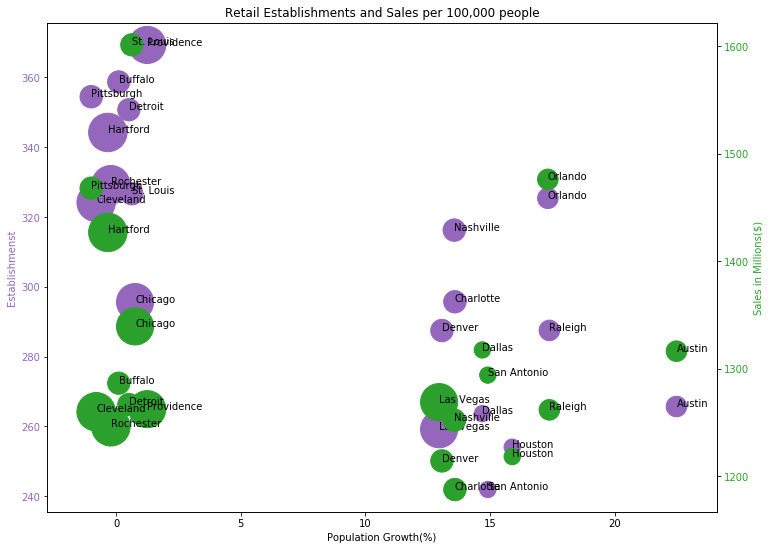

In [19]:
#Create bar chart comparing metros in terms of retail

#Add population growth to table to order put in order of decreasing growth
retail_filtr["Pop_Growth"] = retail_filtr.GeoID.map(growth_dict)
retail_filtr.sort_values(by=["Pop_Growth"], ascending=False, inplace=True)
retail_filtr["MetroArea"] = retail_filtr["MetroArea"].apply(lambda x: x.split('-')[0])
retail_filtr["MetroArea"] = retail_filtr["MetroArea"].apply(lambda x: x.split(',')[0])

#Scatter plots for retail data
#------------

fig, ax11 = plt.subplots(figsize=(12,9))

retail_x = retail_filtr["Pop_Growth"]
retail_y1 = retail_filtr["Est_per_capita"]
retail_y2 = retail_filtr["Sales_per_\ncapita_$millions"]

color = 'tab:purple'
ax11.set_xlabel('Population Growth(%)')
ax11.set_ylabel('Establishmenst', color=color)
ax11.scatter(retail_x, retail_y1, color=color, alpha=1, label='Establishments', s=ent_filtr['Pop_100,000s']*20)
ax11.tick_params(axis='y', labelcolor=color)
for i, txt in enumerate(retail_filtr.MetroArea):
    ax11.annotate(txt, (retail_filtr.Pop_Growth.iat[i], retail_filtr.Est_per_capita.iat[i]))

ax12 = ax11.twinx()

color= 'tab:green'
ax12.set_ylabel('Sales in Millions($)', color=color)
ax12.scatter(retail_x, retail_y2, color=color, alpha=1, label='Sales', s=ent_filtr['Pop_100,000s']*20)
ax12.tick_params(axis='y', labelcolor=color)
ax11.set_title('Retail Establishments and Sales per 100,000 people')
for i, txt in enumerate(retail_filtr.MetroArea):
    ax12.annotate(txt, (retail_filtr.Pop_Growth.iat[i], retail_filtr["Sales_per_\ncapita_$millions"].iat[i]))
plt.savefig('Outputs/Retail_metro_plot.png', bbox_inches='tight')
